In [4]:
# Standard libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df= pd.read_csv("spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [9]:
df[df.duplicated()]


,Category,Message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
#Drop duplicated values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Message   5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [13]:
df.shape

(5169, 2)

In [14]:
df['Category'].value_counts()


ham     4516
spam     653
Name: Category, dtype: int64

## **Data Preprocessing**

In [15]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df = df[['Category', 'Message']].copy()
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1
df.head()


,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# Separate the feature (X) and target (Y) data

X = df["Message"]
Y = df["Category"]

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [18]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: object

In [19]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


## **Feature Extraction: TF-IDF**

In [21]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [22]:
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [23]:
# Convert the target values into 0 and 1

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


In [24]:
print(X_train)

2228                       Those were my exact intentions
5529                            What about this one then.
2149                   Waaaat?? Lololo ok next time then!
5058    Free video camera phones with Half Price line ...
5051    Tick, tick, tick .... Where are you ? I could ...
                              ...                        
4740    Many more happy returns of the day. I wish you...
474     Nice line said by a broken heart- Plz don't cu...
3266                    Ok then i come n pick u at engin?
4016    Eek that's a lot of time especially since Amer...
879     U have a Secret Admirer who is looking 2 make ...
Name: Message, Length: 4135, dtype: object


In [25]:
print(X_train_features)

  (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)	0.2300494583671639
  (3, 251)	0.19582167067522926
  (3, 4299)	0.18532229917229942
  (3, 4630)	0.26549489341098675
  (3, 1997)	0.26549489341098675
  (3, 516)	0.19460402332334106
  (3, 4419)	0.2562131692599451
  (3, 271)	0.23384958966251285
  (3, 5450)	0.2300494583671639
  (3, 3941)	0.18912243046764834
  (3, 5171)	0.20953002785296104
  (3, 3168)	0.19120469004402674
  (3, 4954)	0.23384958966251285
  (3, 1553)	0.20428654549041733
  (3, 6938)	0.19708708091575408
  :	:
  (4132, 1825)	0.3605065932469792
  (4132, 4696)	0.3418197199207224
  (4133, 5893)	0.376872105216547
  (4133, 4973)	0.36369662422743665
  (4133, 2451)	0.376872105216547
  (4133, 901)	0.36369662422743665
  (413

## **Model Training** 

In [26]:
from sklearn.naive_bayes import MultinomialNB

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_features, Y_train)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_features, Y_train)

MultinomialNB()

## **Model Evaluation**

In [27]:
def evaluate_model(model, X_test_features, Y_test, model_name="Model"):
    # Get predictions
    Y_pred = model.predict(X_test_features)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    print(f"\n{'='*60}")
    print(f"🔍 {model_name} Evaluation Metrics")
    print(f"{'-'*60}")
    print(f"📊 Accuracy  : {accuracy:.2f}")
    print(f"🎯 Precision : {precision:.2f}")
    print(f"🔁 Recall    : {recall:.2f}")
    print(f"📏 F1-Score  : {f1:.2f}")
    
    print(f"\n📋 Classification Report ({model_name}):")
    report_dict = classification_report(Y_test, Y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose().round(2)
    print(report_df.to_string())
    print(f"{'='*60}")

evaluate_model(lr_model, X_test_features, Y_test, model_name="Logistic Regression")
evaluate_model(nb_model, X_test_features, Y_test, model_name="Naive Bayes")



🔍 Logistic Regression Evaluation Metrics
------------------------------------------------------------
📊 Accuracy  : 0.96
🎯 Precision : 0.96
🔁 Recall    : 1.00
📏 F1-Score  : 0.98

📋 Classification Report (Logistic Regression):
              precision  recall  f1-score  support
0                  0.98    0.76      0.86   145.00
1                  0.96    1.00      0.98   889.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.97    0.88      0.92  1034.00
weighted avg       0.96    0.96      0.96  1034.00

🔍 Naive Bayes Evaluation Metrics
------------------------------------------------------------
📊 Accuracy  : 0.97
🎯 Precision : 0.96
🔁 Recall    : 1.00
📏 F1-Score  : 0.98

📋 Classification Report (Naive Bayes):
              precision  recall  f1-score  support
0                  1.00    0.76      0.86   145.00
1                  0.96    1.00      0.98   889.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.98    0.88      0.92  1034.00
w

Logistic Regression Evaluation:


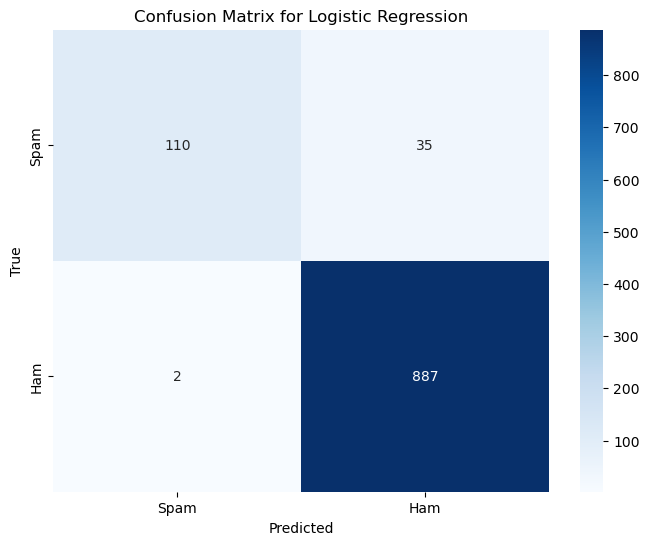


Naive Bayes Evaluation:


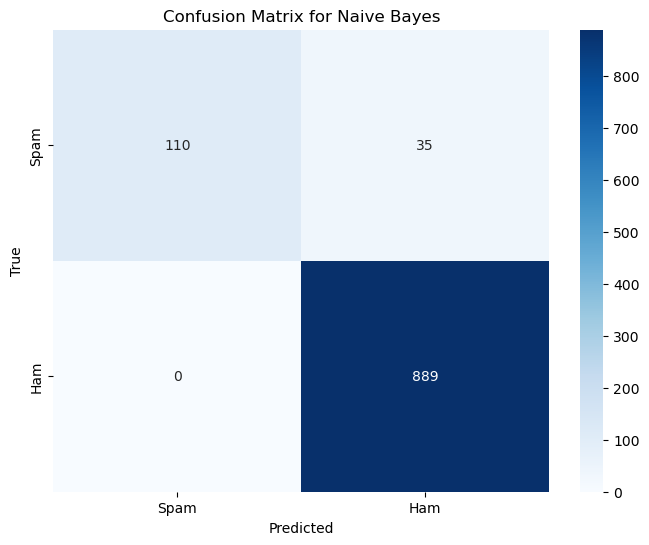

In [28]:

#Confusinon Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
Y_pred_lr = lr_model.predict(X_test_features)
plot_confusion_matrix(Y_test, Y_pred_lr, "Logistic Regression")

# Evaluate Naive Bayes
print("\nNaive Bayes Evaluation:")
Y_pred_nb = nb_model.predict(X_test_features)
plot_confusion_matrix(Y_test, Y_pred_nb, "Naive Bayes")


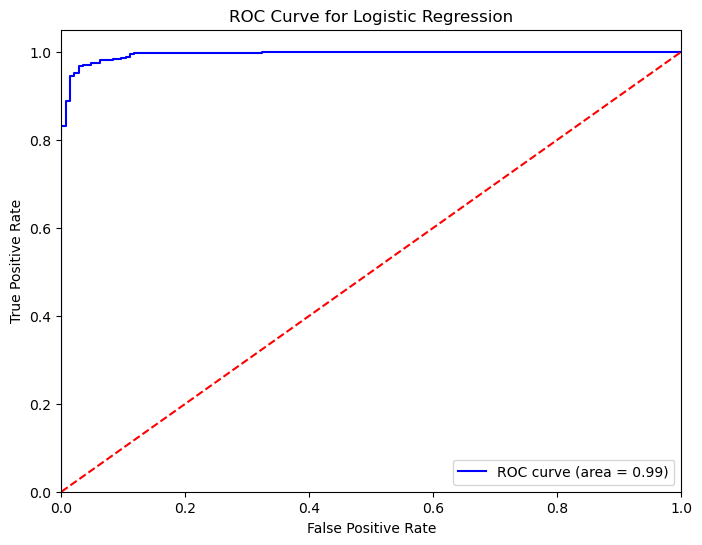

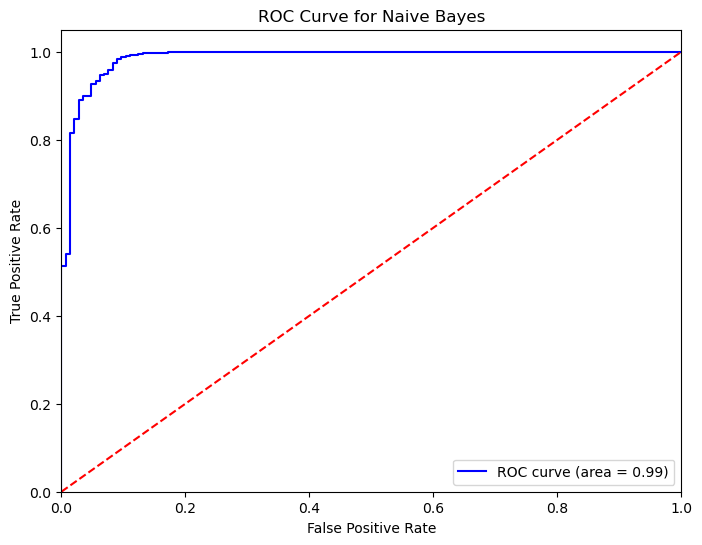

In [29]:
# ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, auc
def plot_roc_curve(y_true, y_scores, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# For Logistic Regression
Y_proba_lr = lr_model.predict_proba(X_test_features)[:, 1]
plot_roc_curve(Y_test, Y_proba_lr, "Logistic Regression")

# For Naive Bayes
Y_proba_nb = nb_model.predict_proba(X_test_features)[:, 1]
plot_roc_curve(Y_test, Y_proba_nb, "Naive Bayes")


In [30]:
import joblib
joblib.dump(nb_model, 'nb_model.pkl')          # Naive Bayes model
joblib.dump(lr_model, 'lr_model.pkl')          # Logistic Regression model
joblib.dump(feature_extraction, 'vectorizer.pkl')  # Save TF-IDF vectorizer

print("Models and vectorizer saved successfully!")


Models and vectorizer saved successfully!
